# Evaluate model for Vietnamese Stock Env

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())
os.chdir(path.parent.absolute())

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_ta as ta
from stable_baselines3.dqn import DQN
from stable_baselines3.ppo import PPO
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy
import mt4_hst
import stock_env
from stock_env.utils import *
from stock_env.envs.vn_stock_env import VietnamStockEnv, VietnamStockV2Env
from stable_baselines3.common.env_checker import check_env
%matplotlib inline

In [2]:
ticker = 'ROS'
env = VietnamStockV2Env(
    df=mt4_hst.read_hst("../stock_datasets/" + ticker + "1440.hst"),
    max_trade_lot=5,
    max_lot=10,
    init_cash=100e3)
check_env(env)
# model = DQN.load("log/dqn_VietnamStockV2Env_" + ticker, env=env)
model = PPO.load("log/ppo_VietnamStockV2Env_" + ticker, env=env)

In [3]:
obs = env.reset()
env._start_tick = 0
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    # obs, _, done, _ = env.step(env.action_space.sample())
    obs, _, done, _ = env.step(action)
history_df = env.get_history()

In [4]:
df = pd.read_csv('temp/history/' + ticker + '.csv')
df.sort_values(by='time', inplace=True)
df.index = pd.to_datetime(df['time'])
portfolio_value = df['portfolio_value']
# portfolio_value = history_df['portfolio_value']

In [7]:
cols = "actions cash quantity cash nav portfolio_value avg_price close step_reward".split()
df[cols].head(50)
# history_df['actions'].describe()

,actions,cash,quantity,cash,nav,portfolio_value,avg_price,close,step_reward
time,,,,,,,,,
2016-10-20,0.000000,54525.756073,1000,54525.756073,48030.303955,102556.060028,44.924244,48.030304,2556.060028
2016-10-21,0.000000,54525.756073,1000,54525.756073,51363.636017,105889.392090,44.924244,51.363636,3333.332062
2016-10-24,0.000000,54525.756073,1000,54525.756073,51136.363983,105662.120056,44.924244,51.136364,-227.272034
2016-10-25,0.000000,54525.756073,1000,54525.756073,54696.968079,109222.724152,44.924244,54.696968,3560.604095
2016-10-26,0.000000,54525.756073,1000,54525.756073,56060.607910,110586.363983,44.924244,56.060608,1363.639832
2016-10-27,0.000000,54525.756073,1000,54525.756073,59924.243927,114450.000000,44.924244,59.924244,3863.636017
2016-10-28,0.010823,54525.756073,1000,54525.756073,64090.911865,118616.667938,44.924244,64.090912,4166.667938
2016-10-31,0.000000,54525.756073,1000,54525.756073,65378.784180,119904.540253,44.924244,65.378784,1287.872314
2016-11-01,0.000000,54525.756073,1000,54525.756073,64393.936157,118919.692230,44.924244,64.393936,-984.848022


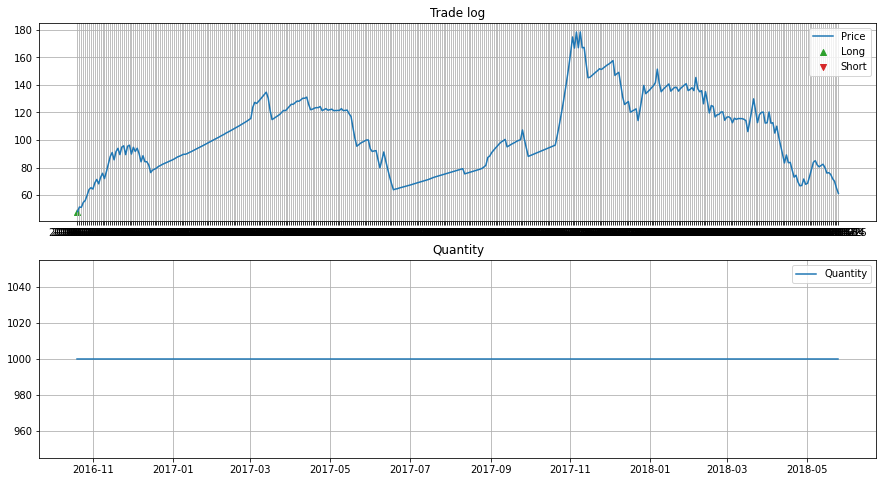

In [5]:
plot_trade_log_v2(df)


    Annual return     :  7.99%
    Cumulative return :  12.84%
    Sharpe ratio      :  0.39
    Maximum Drawdown  : -50.32%
    Annual Volatility :  37.48%
    Value-At-Risk     :  nan%
    


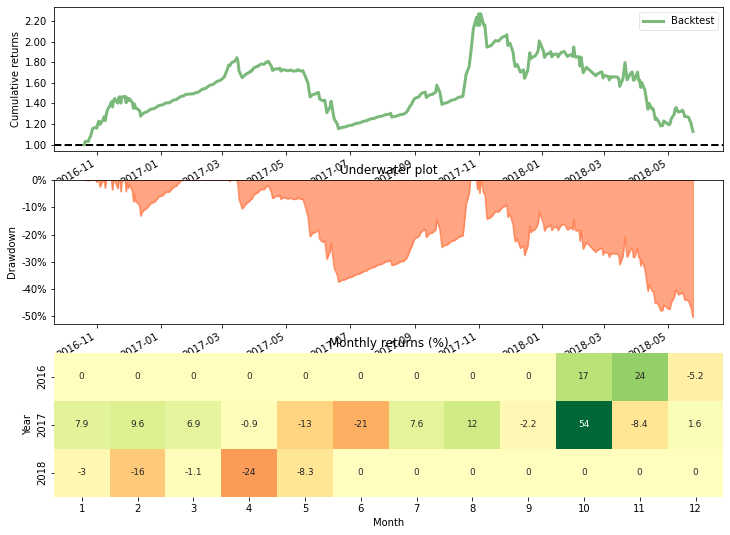

In [6]:
create_performance(portfolio_value.pct_change())